## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Read the csv file and check the first 5 Rows

In [3]:
df=pd.read_csv("Salaries.csv")
df.head(2)

Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2    GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25      NaN  567595.43         567595.43   
1  155966.02   245131.88  137811.38      NaN  538909.28         538909.28   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN

In [4]:
df.tail(10)

Id      EmployeeName                      JobTitle       BasePay  \
148644  148645      Randy D Winn  Stationary Eng, Sewage Plant             0   
148645  148646  Carolyn A Wilson     Human Services Technician             0   
148646  148647      Not provided                  Not provided  Not Provided   
148647  148648    Joann Anderson   Communications Dispatcher 2             0   
148648  148649       Leon Walker                     Custodian             0   
148649  148650     Roy I Tillery                     Custodian             0   
148650  148651      Not provided                  Not provided  Not Provided   
148651  148652      Not provided                  Not provided  Not Provided   
148652  148653      Not provided                  Not provided  Not Provided   
148653  148654         Joe Lopez    Counselor, Log Cabin Ranch             0   

         OvertimePay      OtherPay      Benefits  TotalPay  TotalPayBenefits  \
148644             0             0             0      0.00              0.00   
148645             0             0             0      0.00              0.00   
148646  Not Provided  Not Provided  Not Provided      0.00              0.00   
148647             0             0             0      0.00              0.00   
148648             0             0             0      0.00              0.00   
148649             0             0             0      0.00              0.00   
148650  Not Provided  Not Provided  Not Provided      0.00              0.00   
148651  Not Provided  Not Provided  Not Provided      0.00              0.00   
148652  Not Provided  Not Provided  Not Provided      0.00              0.00   
148653             0       -618.13             0   -618.13           -618.13   

        Year  Notes         Agency Status  
148644  2014    NaN  San Francisco     PT  
148645  2014    NaN  San Francisco     PT  
148646  2014    NaN  San Francisco    NaN  
148647  2014    NaN  San Francisco     PT  
148648  2014    NaN  San Francisco     PT  
148649  2014    NaN  San Francisco     PT  
148650  2014    NaN  San Francisco    NaN  
148651  2014    NaN  San Francisco    NaN  
148652  2014    NaN  San Francisco    NaN  
148653  2014    NaN  San Francisco     PT

In [5]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

Using info(), check the Column Names and its Dataypes, Number of Columns & Rows.

In [7]:
df.shape

(148654, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## Data Cleaning

#drop columns

1. Notes: This can be removed because all of the values in this series are null.

2. Agency : 'San Francisco' is the only unique value in the agency column. Additionally, it is widely known that the dataset was     provided by the San Francisco corporation and that it is common to every row. We can disregard it.

3. ID: Since the combination of column values can be utilized to determine uniqueness, and index column is by default displayed, ID column can be discarded

In [9]:
df['Notes'].isnull().sum()

148654

In [10]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

So we can drop these 3 columns

In [11]:
df.drop(['Id', 'Notes', 'Agency'], axis = 1, inplace = True)

In [12]:
df.head(1)

EmployeeName                                        JobTitle    BasePay  \
0  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   

  OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  Year Status  
0         0.0  400184.25      NaN  567595.43         567595.43  2011    NaN

#Transforming JobTitles

In [13]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [14]:
df['JobTitle'].nunique()

2159

JobTitles are in both uppercase and lowercase. Make it all in lowercase to avoid duplicates.
Need to check the values whether all follows the same pattern

In [15]:
for i in sorted(df['JobTitle'].unique()):
    print(i)

ACCOUNT CLERK
ACCOUNTANT
ACCOUNTANT INTERN
ACPO,JuvP, Juv Prob (SFERS)
ACUPUNCTURIST
ADMINISTRATIVE ANALYST
ADMINISTRATIVE ANALYST II
ADMINISTRATIVE ANALYST III
ADMINISTRATIVE ENGINEER
ADMINISTRATIVE SERVICES MANAGER
ADMINISTRATOR, SFGH MEDICAL CENTER
AFFIRMATIVE ACTION SPECIALIST
AGRICULTURAL INSPECTOR
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS
AIRPORT COMMUNICATIONS OPERATOR
AIRPORT COMMUNICATIONS SUPERVISOR
AIRPORT ECONOMIC PLANNER
AIRPORT ELECTRICIAN
AIRPORT ELECTRICIAN SUPERVISOR
AIRPORT EMERGENCY PLANNING COORDINATOR
AIRPORT MECHANICAL MAINTENANCE SUPERVISOR
AIRPORT NOISE ABATEMENT SPECIALIST
AIRPORT OPERATIONS SUPERVISOR
AIRPORT POLICE SERVICES AIDE
AIRPORT PROPERTY SPECIALIST I
AIRPORT SAFETY OFFICER
ANESTHETIST
ANIMAL CARE ASSISTANT SUPERVISOR
ANIMAL CARE ATTENDANT
ANIMAL CARE SUPERVISOR
ANIMAL CONTROL OFFICER
ANIMAL HEALTH TECHNICIAN
ANIMAL KEEPER
APPRENTICE GARDENER
APPRENTICE STATIONARY ENGINEER
APPRENTICE STATIONARY ENG

In [16]:
df['JobTitle'] = df['JobTitle'].str.lower()

In [17]:
df['JobTitle'].nunique()

1637

Replace the values and create a job title that adheres to uniformity.

In [18]:
exec(open("JobTitlesDict.py").read())
print(len(job_titles_dict))
df['JobTitle'] = df['JobTitle'].replace(job_titles_dict,regex=True)

283


In [19]:
df['JobTitle'].nunique()

1392

#Dulicates Checking

Check whether duplicated rows are present.

In [20]:
df[df.duplicated()]

EmployeeName      JobTitle       BasePay   OvertimePay      OtherPay  \
148650  Not provided  not provided  Not Provided  Not Provided  Not Provided   
148651  Not provided  not provided  Not Provided  Not Provided  Not Provided   
148652  Not provided  not provided  Not Provided  Not Provided  Not Provided   

            Benefits  TotalPay  TotalPayBenefits  Year Status  
148650  Not Provided       0.0               0.0  2014    NaN  
148651  Not Provided       0.0               0.0  2014    NaN  
148652  Not Provided       0.0               0.0  2014    NaN

1. The above rows are not only duplicated. 
2. But the Mandatory columns are not having sufficient details for analysis.
3. Instead of Name,JobTitle values it is given as 'Not provided' . Also, we need to check any other columns also having Not prvided value in the dataset.

In [21]:
filtered_rows = df[df.apply(lambda x: any(val in ['Not provided', 'Not Provided'] for val in x.values), axis=1)]
filtered_rows

EmployeeName                JobTitle       BasePay   OvertimePay  \
13797   Not Provided  public safetycomm disp      57963.39      19683.91   
44151   Not Provided  public safetycomm disp      82196.52       25934.2   
148646  Not provided            not provided  Not Provided  Not Provided   
148650  Not provided            not provided  Not Provided  Not Provided   
148651  Not provided            not provided  Not Provided  Not Provided   
148652  Not provided            not provided  Not Provided  Not Provided   

            OtherPay      Benefits   TotalPay  TotalPayBenefits  Year Status  
13797        4373.86           NaN   82021.16          82021.16  2011    NaN  
44151        3752.49       38024.3  111883.21         149907.51  2012    NaN  
148646  Not Provided  Not Provided       0.00              0.00  2014    NaN  
148650  Not Provided  Not Provided       0.00              0.00  2014    NaN  
148651  Not Provided  Not Provided       0.00              0.00  2014    NaN  
148652  Not Provided  Not Provided       0.00              0.00  2014    NaN

2 rows lack only the Employee Name. We can retain it for analysis as other columns contain relevant values.

The values in Other 4 rows are meaningless except year column.  We can't fill up so we can discard it.

#Drop Duplicates

In [22]:
indices=[148646,148650,148651,148652]
df=df.drop(indices)

#converting datatyes

BasePay, OvertimePay, OtherPay, Benefits columns should be in Numeric Datatype. 
Hence, those columns are casted to perform calculations.

In [23]:
df['BasePay'] = pd.to_numeric(df['BasePay'],errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors='coerce')

#Negative Values

BasePay, OvertimePay, OtherPay, Benefits columns are having negative values. Let's analyse the reasons

In [24]:
df.describe(include='all').T

count  unique               top   freq          mean  \
EmployeeName        148650  110810         Kevin Lee     13           NaN   
JobTitle            148650    1391  transit operator   9424           NaN   
BasePay           148045.0     NaN               NaN    NaN  66325.448841   
OvertimePay       148650.0     NaN               NaN    NaN   5066.059886   
OtherPay          148650.0     NaN               NaN    NaN   3648.767297   
Benefits          112491.0     NaN               NaN    NaN  25007.893151   
TotalPay          148650.0     NaN               NaN    NaN  74770.333901   
TotalPayBenefits  148650.0     NaN               NaN    NaN  93695.075969   
Year              148650.0     NaN               NaN    NaN   2012.522603   
Status               38119       2                FT  22334           NaN   

                           std      min         25%       50%          75%  \
EmployeeName               NaN      NaN         NaN       NaN          NaN   
JobTitle                   NaN      NaN         NaN       NaN          NaN   
BasePay           42764.635495  -166.01     33588.2  65007.45     94691.05   
OvertimePay       11454.380559    -0.01         0.0       0.0     4658.175   
OtherPay           8056.601866 -7058.59         0.0    811.27     4236.065   
Benefits          15402.215858   -33.89   11535.395  28628.62    35566.855   
TotalPay          50516.196009  -618.13   36169.955  71427.24    105842.96   
TotalPayBenefits  62792.497391  -618.13  44073.3375  92406.02  132877.9925   
Year                  1.117526   2011.0      2012.0    2013.0       2014.0   
Status                     NaN      NaN         NaN       NaN          NaN   

                        max  
EmployeeName            NaN  
JobTitle                NaN  
BasePay           319275.01  
OvertimePay       245131.88  
OtherPay          400184.25  
Benefits           96570.66  
TotalPay          567595.43  
TotalPayBenefits  567595.43  
Year                 2014.0  
Status                  NaN

21 rows are having negative values in pay columns (basepay,overtimePay,OtherPay,Benefits,TotalPay,TotalBenefits) 

Junior Clerk and Clerk are having a pattern of negative BasePay. 
Police Officer 3 - is having Null Basepay, But otherPay, Benefits are negative.
Some are having BasePay is zero and negative benefits.

In [25]:
float_columns = df.select_dtypes(include='float64').columns  
filtered_rows = df[(df[float_columns] < 0).any(axis=1)]
print(filtered_rows.index.shape)
filtered_rows

(21,)


EmployeeName                         JobTitle    BasePay  \
72832           Irwin Sidharta                     junior clerk    -166.01   
72865             Robert Scott                     junior clerk    -121.63   
72872          Chung Huey Kung                     junior clerk    -109.22   
72874                Jordan Li                     junior clerk    -106.60   
72878          Richard Jackson                     junior clerk    -101.88   
72884   DiMarco McGhee-Stewart                     junior clerk     -93.14   
72888       Leopoldo Marasigan                     junior clerk     -87.38   
72894           Douglas Avalos                     junior clerk     -75.67   
72908          Norma Rodriguez                     junior clerk     -59.59   
72920         Charles Williams                     junior clerk     -30.58   
72922              John Draper                            clerk      -9.50   
84969                Pei  Meng  is business analyst - principal  101274.51   
90714        Claudia M Sanchez        senior eligibility worker   75033.03   
93200             Jose A Lemus             custodial supervisor   66744.00   
96168         John G Alexander                         gardener   59733.32   
107184        Amelie E Bullard                    special nurse    6932.50   
110528        Timothy E Gibson               police officer iii        NaN   
110529          Mark E Laherty               police officer iii        NaN   
110530           David P Kucia               police officer iii        NaN   
144099      Leticia Villacampa                     secretary ii       0.00   
148653               Joe Lopez       counselor, log cabin ranch       0.00   

        OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  Year  \
72832        249.02      0.00      6.56     83.01             89.57  2012   
72865        182.70      0.00      5.44     61.07             66.51  2012   
72872        163.83      0.00      4.32     54.61             58.93  2012   
72874        159.90      0.00      4.66     53.30             57.96  2012   
72878        153.08      0.00      4.55     51.20             55.75  2012   
72884        139.97      0.00      4.17     46.83             51.00  2012   
72888        131.06      0.00      3.89     43.68             47.57  2012   
72894        113.76      0.00      3.39     38.09             41.48  2012   
72908         89.65      0.00      2.68     30.06             32.74  2012   
72920         45.87      0.00      1.36     15.29             16.65  2012   
72922         14.25      0.00      0.42      4.75              5.17  2012   
84969          0.00  -7058.59  34583.40  94215.92         128799.32  2013   
90714         -0.01   1540.00  28864.64  76573.02         105437.66  2013   
93200       2234.40     -9.60  26889.04  68968.80          95857.84  2013   
96168         46.76    -46.76  25863.91  59733.32          85597.23  2013   
107184         0.00    -50.19    418.03   6882.31           7300.34  2013   
110528         0.00      0.00     -2.73      0.00             -2.73  2013   
110529         0.00      0.00     -8.20      0.00             -8.20  2013   
110530         0.00      0.00    -33.89      0.00            -33.89  2013   
144099         0.00   9991.77    -13.80   9991.77           9977.97  2014   
148653         0.00   -618.13      0.00   -618.13           -618.13  2014   

       Status  
72832     NaN  
72865     NaN  
72872     NaN  
72874     NaN  
72878     NaN  
72884     NaN  
72888     NaN  
72894     NaN  
72908     NaN  
72920     NaN  
72922     NaN  
84969     NaN  
90714     NaN  
93200     NaN  
96168     NaN  
107184    NaN  
110528    NaN  
110529    NaN  
110530    NaN  
144099     PT  
148653     PT

In payroll, it's unusual for base pay to be negative/Zero. Base pay typically represents the fixed amount of compensation, an employee receives for their work, and it's commonly a non-negative value.

It could be happened due to any mistakes, adjustments, deductions, or unusual circumstances, but it's not standard practice for base pay to be negative.

Let's consider here, the negative/zero are as adjustments/deductions in the payroll and let them retain it as it is. 


#Missing Values

In [26]:
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
dtype: int64

225 unique Job Titles( 605) are there where BasePay is Null.
BasePay is Null in the Year 2013 only.
Also, those rows are having the Status column as Null

In [27]:
df1=df[df['BasePay'].isna()][['Year','JobTitle','Status']]
print(df1['JobTitle'].value_counts() ,"\n")
print(df1['JobTitle'].value_counts().shape ,"\n")
print( df1['Status'].value_counts(),"\n")
print( df1['Year'].value_counts())
df1

transit operator                  61
commissioner 16.700c, no pay      49
recreation director               22
deputy sheriff                    19
assistant recreation director     14
                                  ..
sewer maintenance worker           1
utility plumber apprentice         1
real property manager              1
sr statnry eng, wtr treat plnt     1
manager vii                        1
Name: JobTitle, Length: 225, dtype: int64 

(225,) 

Series([], Name: Status, dtype: int64) 

2013    605
Name: Year, dtype: int64


Year                   JobTitle Status
81391   2013             deputy chief 3    NaN
84506   2013  licensed vocational nurse    NaN
84960   2013        park patrol officer    NaN
90525   2013         police officer iii    NaN
90786   2013             deputy sheriff    NaN
...      ...                        ...    ...
110526  2013    ps aide health services    NaN
110527  2013               senior clerk    NaN
110528  2013         police officer iii    NaN
110529  2013         police officer iii    NaN
110530  2013         police officer iii    NaN

[605 rows x 3 columns]


NaN values for BasePay can be filled up with mean values based on year,job titles.

In [28]:
mean_base_pay = df.groupby(['JobTitle','Year'])['BasePay'].mean().reset_index()
df1=round(mean_base_pay,2)
df1

JobTitle  Year    BasePay
0     aassistant chief district attorney's investigator  2012  114098.01
1     aassistant chief district attorney's investigator  2013  100555.60
2     aassistant chief district attorney's investigator  2014   97112.11
3                                         account clerk  2011   43300.81
4                                         account clerk  2012   45111.86
...                                                 ...   ...        ...
4113                                 youth comm advisor  2012   57544.73
4114                                 youth comm advisor  2013   33174.84
4115                                 youth comm advisor  2014   32417.42
4116     youth commission advisor, board of supervisors  2011   52609.91
4117                                        zoo curator  2011   43148.00

[4118 rows x 3 columns]

In [90]:
MeanBase = df.groupby(['JobTitle','Year'])['BasePay'].transform('mean')
df['BasePay'].fillna(MeanBase, inplace=True)

still 44 rows are NaN. It is because they are already null in 2013. so we need to remove yearwise grouping condition before fill na values.

In [91]:
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
Title_len                0
SalPerks                 0
dtype: int64

In [31]:
df.loc[(df['BasePay'].isna())]

EmployeeName                       JobTitle  BasePay  \
102303          Robert E Evans     captain, (fire department)      NaN   
103828             Tommy C Mak            recreation director      NaN   
104349       James C Francisco  assistant recreation director      NaN   
104495           Michael J Lee  assistant recreation director      NaN   
104633         Patrick J Perez  assistant recreation director      NaN   
105369  Nelvyne  Mickels-Smith     senior data entry operator      NaN   
105616        Roberta L Thomas  assistant recreation director      NaN   
106422    Joseph L Vegas-Scott            recreation director      NaN   
106727    Paulette  Washington            recreation director      NaN   
106733            Winnie  Chin  assistant recreation director      NaN   
106741            Ronald  Hill            recreation director      NaN   
106742          Marty M Arenas  assistant recreation director      NaN   
106743          Germond J Gray            recreation director      NaN   
106745         Tiffany M Rasso            recreation director      NaN   
106753          Shawna L Suazo            recreation director      NaN   
106756           Daisy  Austin            recreation director      NaN   
106758           Wayne E Barry            recreation director      NaN   
106762     Brianna J Calabrese            recreation director      NaN   
106765        Khaldun M Rucker            recreation director      NaN   
106769            Jessica  Luu            recreation director      NaN   
106797           Trina E Lintz            recreation director      NaN   
106811        Lorraine D Hanks  assistant recreation director      NaN   
106813             Lynn S Wood            recreation director      NaN   
106819         Maiyio  Jackson            recreation director      NaN   
106824       Rajan T Alexander  assistant recreation director      NaN   
106827           Jamaal V Dunn            recreation director      NaN   
106831        Tamara  Mayfield  assistant recreation director      NaN   
106839              Floyd  Ray  assistant recreation director      NaN   
106841           Diana  Brener            recreation director      NaN   
106845   Christopher C Gaggero            recreation director      NaN   
106847       Mazetta P Garrett            recreation director      NaN   
106869           Scott C Golde            recreation director      NaN   
106871         Rosa L Robinson  assistant recreation director      NaN   
106891  Gayle A Jones-Lockhart            recreation director      NaN   
106902       Catherine A Dukes        public safety comm tech      NaN   
106909          Margot  Gibney         drug court coordinator      NaN   
106933     Carmelita L Guevara          is operator - journey      NaN   
106963         Hiedi L Antoine      is technician - assistant      NaN   
106971      Teresa V Lewkowitz  assistant recreation director      NaN   
106978        Jasmine M Romero  assistant recreation director      NaN   
108503        Saundra S Magana              head photographer      NaN   
109275            Diana J Chin  assistant recreation director      NaN   
110176          Curtis L Aaron            recreation director      NaN   
110516        Maria D Quinones        senior assessment clerk      NaN   

        OvertimePay  OtherPay  Benefits  TotalPay  TotalPayBenefits  Year  \
102303          0.0  35332.78      0.00  35332.78          35332.78  2013   
103828          0.0  12944.68   8274.08  12944.68          21218.76  2013   
104349          0.0   9398.04   8239.24   9398.04          17637.28  2013   
104495          0.0   8476.70   8274.13   8476.70          16750.83  2013   
104633          0.0   7885.45   7959.18   7885.45          15844.63  2013   
105369          0.0   3991.07   8428.38   3991.07          12419.45  2013   
105616          0.0   3425.00   7959.18   3425.00          11384.18  2013   
106422          0.0   8596.31      0.00   8596.31           8596.31  20

In [93]:
df.loc[(df['JobTitle']=='recreation director')& (df['Year']==2013)]

EmployeeName             JobTitle  BasePay  OvertimePay  \
103828             Tommy C Mak  recreation director      0.0          0.0   
106422    Joseph L Vegas-Scott  recreation director      0.0          0.0   
106727    Paulette  Washington  recreation director      0.0          0.0   
106741            Ronald  Hill  recreation director      0.0          0.0   
106743          Germond J Gray  recreation director      0.0          0.0   
106745         Tiffany M Rasso  recreation director      0.0          0.0   
106753          Shawna L Suazo  recreation director      0.0          0.0   
106756           Daisy  Austin  recreation director      0.0          0.0   
106758           Wayne E Barry  recreation director      0.0          0.0   
106762     Brianna J Calabrese  recreation director      0.0          0.0   
106765        Khaldun M Rucker  recreation director      0.0          0.0   
106769            Jessica  Luu  recreation director      0.0          0.0   
106797           Trina E Lintz  recreation director      0.0          0.0   
106813             Lynn S Wood  recreation director      0.0          0.0   
106819         Maiyio  Jackson  recreation director      0.0          0.0   
106827           Jamaal V Dunn  recreation director      0.0          0.0   
106841           Diana  Brener  recreation director      0.0          0.0   
106845   Christopher C Gaggero  recreation director      0.0          0.0   
106847       Mazetta P Garrett  recreation director      0.0          0.0   
106869           Scott C Golde  recreation director      0.0          0.0   
106891  Gayle A Jones-Lockhart  recreation director      0.0          0.0   
110176          Curtis L Aaron  recreation director      0.0          0.0   

        OtherPay  Benefits  TotalPay  TotalPayBenefits  Year Status  \
103828  12944.68   8274.08  21218.76          21218.76  2013    NaN   
106422   8596.31      0.00   8596.31           8596.31  2013    NaN   
106727      0.00   7959.18   7959.18           7959.18  2013    NaN   
106741      0.00   7959.18   7959.18           7959.18  2013    NaN   
106743      0.00   7959.18   7959.18           7959.18  2013    NaN   
106745      0.00   7959.18   7959.18           7959.18  2013    NaN   
106753      0.00   7959.18   7959.18           7959.18  2013    NaN   
106756      0.00   7959.18   7959.18           7959.18  2013    NaN   
106758      0.00   7959.18   7959.18           7959.18  2013    NaN   
106762      0.00   7959.18   7959.18           7959.18  2013    NaN   
106765      0.00   7959.18   7959.18           7959.18  2013    NaN   
106769      0.00   7959.18   7959.18           7959.18  2013    NaN   
106797      0.00   7959.18   7959.18           7959.18  2013    NaN   
106813      0.00   7959.18   7959.18           7959.18  2013    NaN   
106819      0.00   7959.18   7959.18           7959.18  2013    NaN   
106827      0.00   7959.18   7959.18           7959.18  2013    NaN   
106841      0.00   7959.18   7959.18           7959.18  2013    NaN   
106845      0.00   7959.18   7959.18           7959.18  2013    NaN   
106847      0.00   7959.18   7959.18           7959.18  2013    NaN   
106869      0.00   7959.18   7959.18           7959.18  2013    NaN   
106891      0.00   7959.18   7959.18           7959.18  2013    NaN   
110176    482.11      0.00    482.11            482.11  2013    NaN   

        Title_len  SalPerks  
103828         19  21218.76  
106422         19   8596.31  
106727         19   7959.18  
106741         19   7959.18  
106743         19   7959.18  
106745         19   7959.18  
106753         19   7959.18  
106756         19   7959.18  
106758         19   7959.18  
106762         19   7959.18  
106765         19   7959.18  
106769         19   7959.18  
106797         19   7959.18  
106813         19   7959.18  
106819         19   7959.18  
106827         19   7959.18  
106841         19   7959.18  
106845         19   7959.18  
106847         19   7959.18  
106869      

In [94]:
MeanBase = df.groupby(['JobTitle'])['BasePay'].transform('mean')
df['BasePay'].fillna(MeanBase, inplace=True)

4 rows

In [95]:
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
Title_len                0
SalPerks                 0
dtype: int64

In [35]:
df.loc[(df['BasePay'].isna())]

EmployeeName                    JobTitle  BasePay  OvertimePay  \
102303  Robert E Evans  captain, (fire department)      NaN          0.0   
106909  Margot  Gibney      drug court coordinator      NaN          0.0   

        OtherPay  Benefits  TotalPay  TotalPayBenefits  Year Status  
102303  35332.78      0.00  35332.78          35332.78  2013    NaN  
106909      0.00   7959.18      0.00           7959.18  2013    NaN

In [36]:
JobTitles=['Public Safety Comm Tech','Drug Court Coordinator','IS Technician Assistant','Captain, (Fire Department)']
df.loc[(df['JobTitle'].isin(JobTitles))]

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Status]
Index: []

As these four jobTitles are unique and null, we can fill the base average value of BasePay.

In [37]:
AvgBase = df['BasePay'].mean()
df['BasePay'].fillna(AvgBase, inplace=True) 

round to 2 places of decimals for all BasePay values

In [38]:
df['BasePay'] = df['BasePay'].round(2)

Now, BasePay becoms zero NaN values

In [39]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
dtype: int64

# check and fill benefits

Similarly , we can fill na values for Benefits.

In many organizations, payroll benefits can indeed be influenced by job titles. 
The benefits an employee receives, such as health insurance, retirement plans, bonuses, or additional compensation, can be tied to their job title or position within the company.

Hence, we can fill the benefits Nan values with the Mean of benefits which is grouped by JobTitles,Year


The Benefits column is having Null Values , in the mean time , lets check how the other columns are displayed in the dataframe.

- It shows only the  Year 2011, 
- 1045 unique JobTitles are there
- Status column is Nan


In [40]:
df1=df[df['Benefits'].isna()][['Year','JobTitle','Status']]
print(df1['JobTitle'].value_counts() ,"\n")
print( df1['Status'].value_counts(),"\n")
print( df1['Year'].value_counts())
df1

transit operator                       2388
special nurse                          1402
registered nurse                       1219
custodian                               796
firefighter                             794
                                       ... 
special assistant xviii                   1
asphalt plant supervisor i                1
legislative calendar clerk                1
assistant superintendent recreation       1
public safety comm tech                   1
Name: JobTitle, Length: 1045, dtype: int64 

Series([], Name: Status, dtype: int64) 

2011    36159
Name: Year, dtype: int64


Year                                        JobTitle Status
0      2011  general manager-metropolitan transit authority    NaN
1      2011                 captain iii (police department)    NaN
2      2011                 captain iii (police department)    NaN
3      2011                  wire rope cable maint mechanic    NaN
4      2011    deputy chief of department,(fire department)    NaN
...     ...                                             ...    ...
36154  2011                   swimming instr/pool lifeguard    NaN
36155  2011                                transit operator    NaN
36156  2011      stationary engineer, water treatment plant    NaN
36157  2011                                transit operator    NaN
36158  2011                                      manager iv    NaN

[36159 rows x 3 columns]

Checked any patten followed between Benefits and Status.
But it is not evident any.
Also, (from the Below) we can't discriminate the status as PT or FT. Cannot fill the Status NaN with any values.

Hence, we can fill the benefits Nan values with the Mean of benefits which is grouped by JobTitles,Year

In [41]:
non_zero_BP = df['BasePay'] != 0
df['Bene%'] = np.where(non_zero_BP, (100 / df['BasePay']) * df['Benefits'], np.nan)

In [42]:
df.loc[(df['Benefits']>1000)].sort_values(by='JobTitle').shape
df.loc[(df['Bene%']>=0) & (df['JobTitle']=='ASR Senior Office Specialist')& df[['JobTitle','Benefits','Status']].notna().all(axis=1)].sort_values(by='JobTitle')

Empty DataFrame
Columns: [EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Status, Bene%]
Index: []

In [43]:
result = df.groupby('JobTitle').agg(
    JobTitleCount=('JobTitle', 'size'),
    MinBenefits=('Benefits', 'mean'),
    ).reset_index()
result

JobTitle  JobTitleCount  \
0     aassistant chief district attorney's investigator             15   
1                                         account clerk            351   
2                                            accountant              5   
3                                          accountant i              8   
4                                         accountant ii            226   
...                                                 ...            ...   
1386                     worker's compensation adjuster             95   
1387                              x-ray laboratory aide            126   
1388                                 youth comm advisor              4   
1389     youth commission advisor, board of supervisors              1   
1390                                        zoo curator              1   

       MinBenefits  
0     32859.567333  
1     19911.574590  
2              NaN  
3     26086.087500  
4     27730.821327  
...            ...  
1386  28072.155946  
1387  18697.180500  
1388  18704.242500  
1389           NaN  
1390           NaN  

[1391 rows x 3 columns]

In [44]:
MeanBenefits = df.groupby(['JobTitle'])['Benefits'].transform('mean')
df['Benefits'].fillna(MeanBenefits, inplace=True)

Still Null values(12237) are there. Means, those job titles are already having Null Benefits. we can't calculate mean.
so, we need to remove groupwise condition and fill na with mean Benefits.

In [45]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits              7168
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
Bene%                37028
dtype: int64

In [46]:
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

In [47]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
Bene%                37028
dtype: int64

In [48]:
df.drop(['Bene%'], axis = 1, inplace = True)

In [49]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110531
dtype: int64

As BasePay and benefits values are changed, we need to calculate TotalPay,TotalBenefits again and assign the values permanently to the dataframe.

In [50]:
df['BasePay']=round(df['BasePay'],2)
df['Benefits']=round(df['Benefits'],2)

In [51]:
df['TotalPay'] = df['BasePay'] + df['OvertimePay']+df['OtherPay']+df['Benefits']
df['TotalPayBenefits'] = df['BasePay'] + df['OvertimePay']+df['OtherPay']+df['Benefits']

validating the calculation

In [182]:
df.head(1)

EmployeeName                                        JobTitle    BasePay  \
0  NATHANIEL FORD  general manager-metropolitan transit authority  167411.18   

   OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year Status  \
0          0.0  400184.25  25121.59  592717.02         592717.02  2011    NaN   

   Title_len  SalBenefits  
0         46    425305.84

## Data Visualization

What are the Five job titles having the highest average base pay, benefits, overtime pay, and other pay?

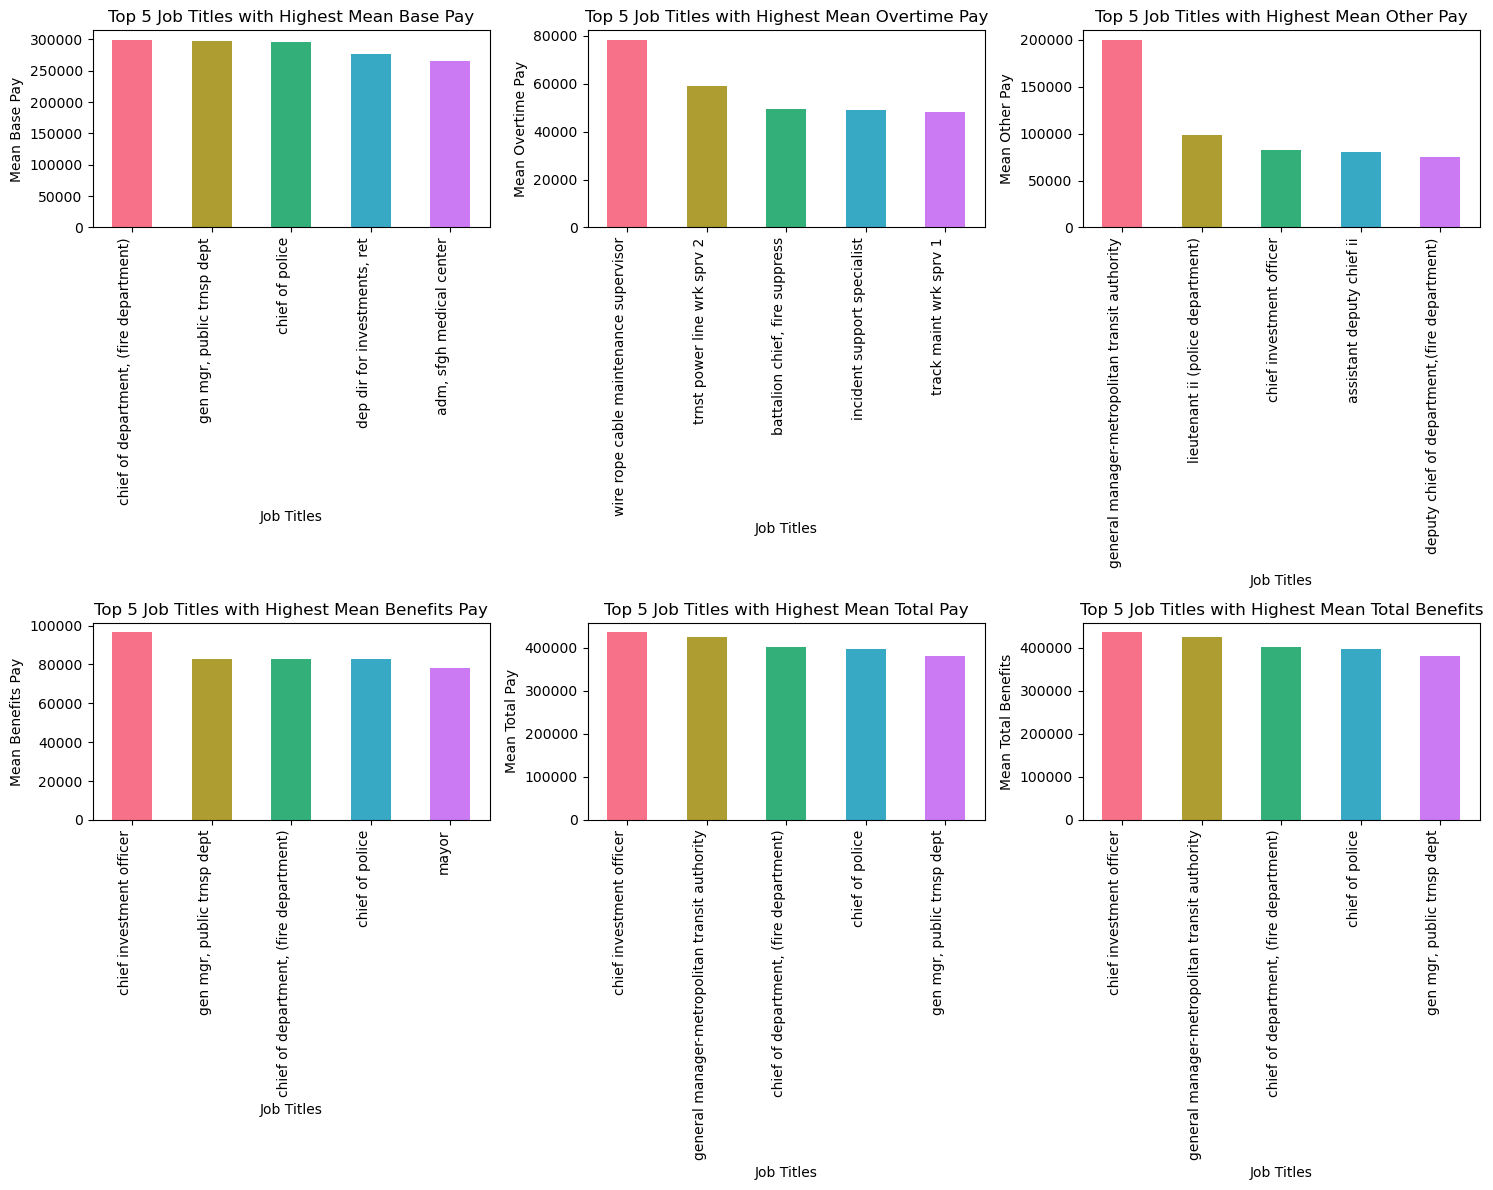

In [53]:
plt.figure(figsize=(15, 12))
colors = sns.color_palette('husl', 5)
# Plot for Mean Base Pay
top_job_titles_base_pay = round(df.groupby(['JobTitle'])['BasePay'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot

top_job_titles_base_pay.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Base Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Base Pay')
plt.xticks(rotation=90, ha='right')

# Plot for Mean Overtime Pay
top_job_titles_overtime_pay = round(df.groupby(['JobTitle'])['OvertimePay'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, 2nd subplot

top_job_titles_overtime_pay.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Overtime Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Overtime Pay')
plt.xticks(rotation=90, ha='right')

# Plot for Mean Other Pay
top_job_titles_other_pay = round(df.groupby(['JobTitle'])['OtherPay'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, 3rd subplot

top_job_titles_other_pay.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Other Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Other Pay')
plt.xticks(rotation=90, ha='right')

# Plot for Mean Benefits
top_job_titles_benefits = round(df.groupby(['JobTitle'])['Benefits'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, 4th subplot

top_job_titles_benefits.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Benefits Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Benefits Pay')
plt.xticks(rotation=90, ha='right')

# Plot for Mean Total Pay
top_job_titles_total_pay = round(df.groupby(['JobTitle'])['TotalPay'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, 5th subplot

top_job_titles_total_pay.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Total Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Total Pay')
plt.xticks(rotation=90, ha='right')


# Plot for Mean Total Pay
total_benefits = round(df.groupby(['JobTitle'])['TotalPayBenefits'].mean(), 2).nlargest(5)
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, 6th subplot

total_benefits.plot(kind='bar', color=colors)
plt.title('Top 5 Job Titles with Highest Mean Total Benefits')
plt.xlabel('Job Titles')
plt.ylabel('Mean Total Benefits')
plt.xticks(rotation=90, ha='right')


# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Highest Frequency  of Job Titles (Top 10) and its Average Salary

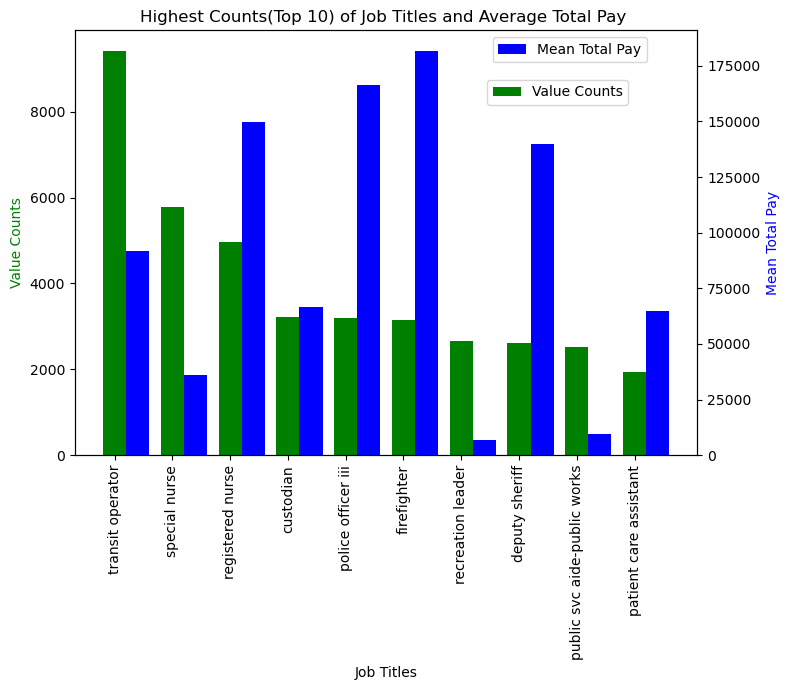

In [56]:
job_title_value_counts = df['JobTitle'].value_counts().nlargest(10)
top_10_job_titles = job_title_value_counts.index.tolist()
mean_totalpay_by_job = df[df['JobTitle'].isin(top_10_job_titles)].groupby('JobTitle')['TotalPay'].mean()
mean_totalpay_aligned = mean_totalpay_by_job.loc[top_10_job_titles]
# Create a figure and axis for the double bar plot
fig, ax = plt.subplots(figsize=(8, 7))

# Plot value counts of job titles (top 10) in the first bar group
ax.bar(range(len(job_title_value_counts)), job_title_value_counts.values, width=0.4, color='green', label='Value Counts')

# Create a twin axis for the right side labels
ax2 = ax.twinx()

# Plot mean total pay by job title in the second bar group
ax2.bar([x + 0.4 for x in range(len(mean_totalpay_aligned))], mean_totalpay_aligned.values, width=0.4, color='blue', label='Mean Total Pay')

# Set labels, title, and legend
ax.set_xlabel('Job Titles')
ax.set_ylabel('Value Counts', color='green')
ax2.set_ylabel('Mean Total Pay', color='blue')
ax.set_title('Highest Counts(Top 10) of Job Titles and Average Total Pay ')
ax.set_xticks(range(len(job_title_value_counts)))
ax.set_xticklabels(job_title_value_counts.index, rotation=90)

ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
ax2.legend(loc='upper right', bbox_to_anchor=(0.93, 1.0))


plt.tight_layout()
plt.show()


#Check number of Employees group by Year

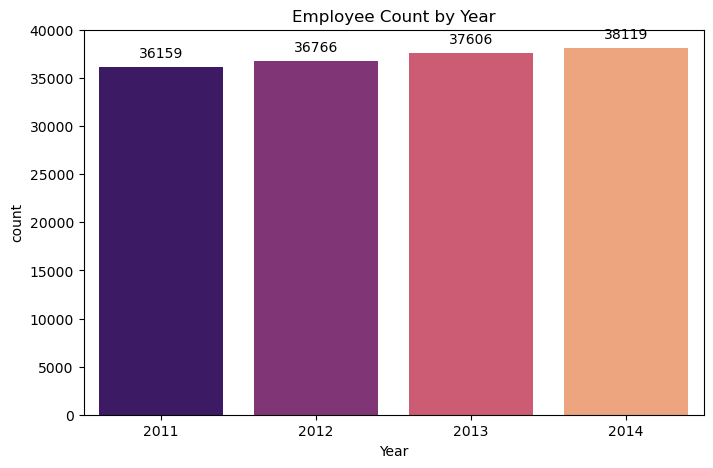

In [186]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Year', data=df, palette='magma')
plt.title('Employees Count by Year')

# Add count values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

plt.show()

An increase in employees year over year indicates positive success in city development.

##Pair Plot - BasePay', 'Benefits', 'OvertimePay', 'OtherPay'  by status

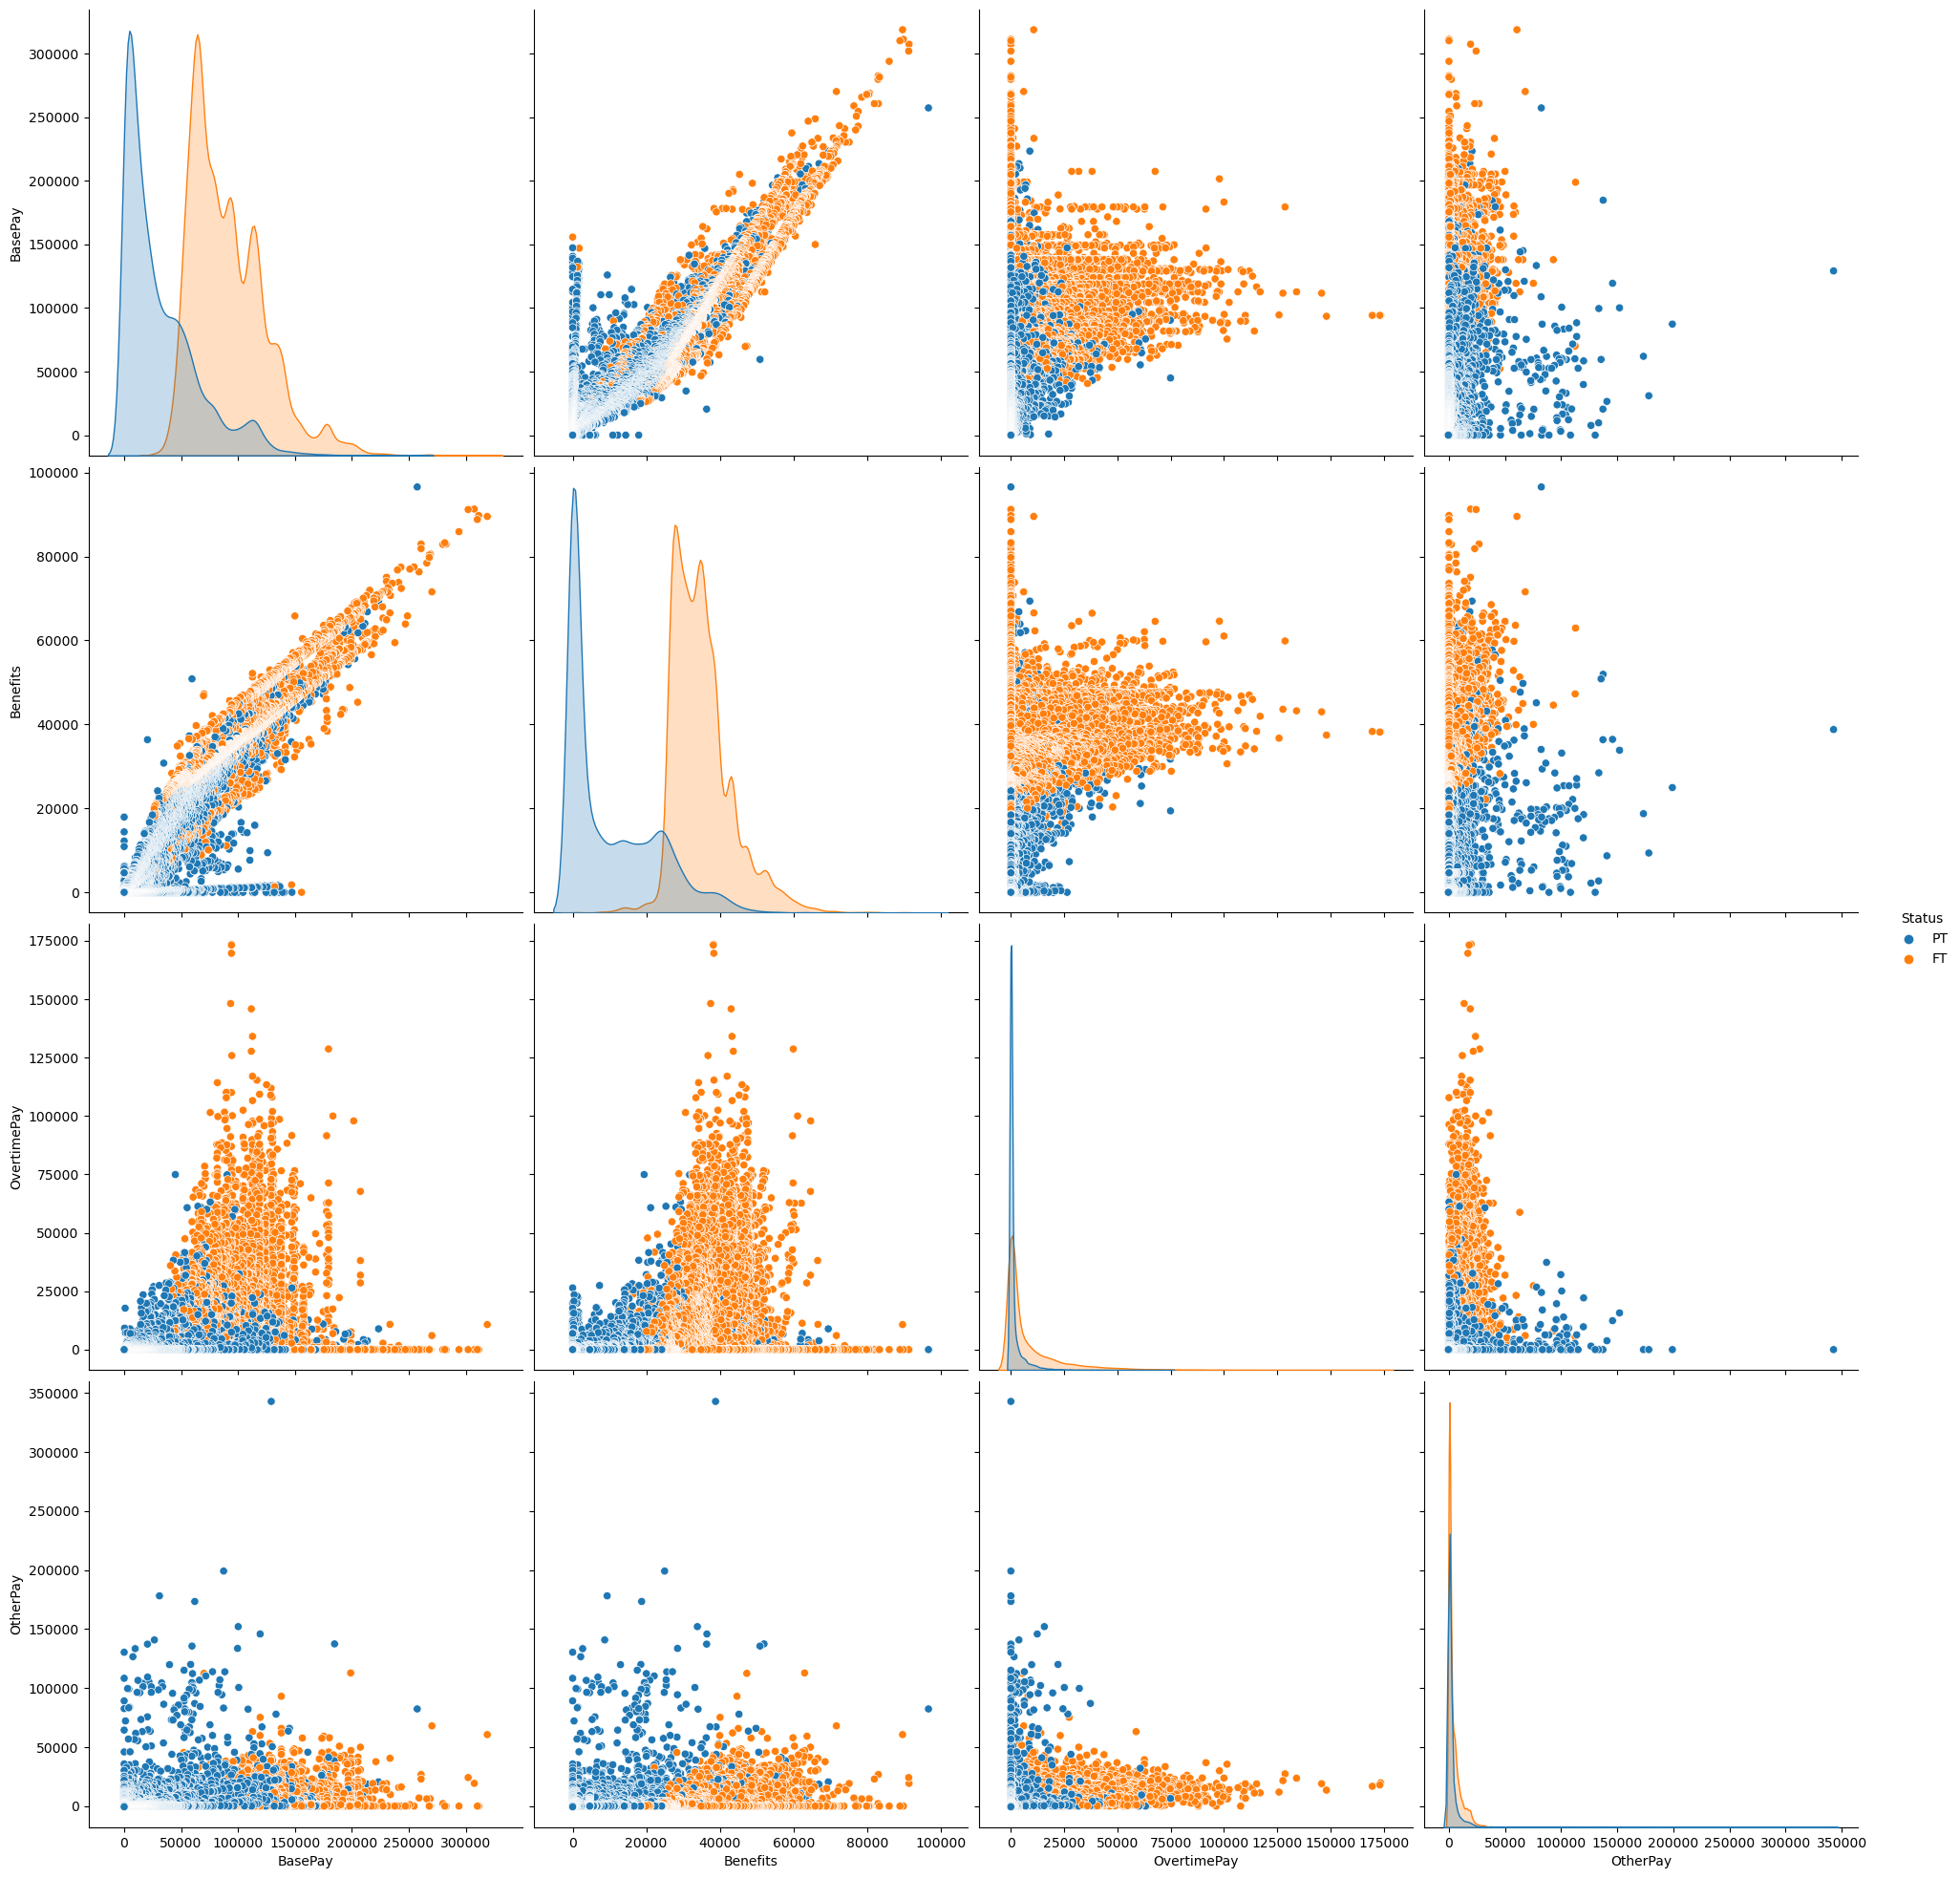

In [101]:
sns.pairplot(df, hue='Status', vars=['BasePay', 'Benefits', 'OvertimePay', 'OtherPay'], height=5)
plt.show()

BasePay:
    1. Lower range BasePay densed more with low OtherPay and few are distributed more than BasePay in PT. 
        Higher range BasePay shares also low OtherPay in FullTime
    2. Overtime Pay is not evenly distributed to all in PT, whereas in FT, Overtimepay is more in the middle range of the BasePay.
    3. In PT, Benefits are very less but in FT, More Benefits with more BasePay, it seems directly proportional. 
    4. Hence, Basepay is distributed most below the range of 50K

Benefits:
    1. Lower range Benefits correlated with lower Otherpay. Few are densed more OtherPay in PT.
       compared to PT, FT has more counts and most of them are distributed with less otherpay even though benefits gets higher
    2. Very Less counts of PT people are getting OvertimePay . that too low range along with Benefits. below 15000 range is hightly densed.
        But in FT, Overtime Pay is  signigicantly high in the middle range of Benefits. More counts are visible than PT.
    3. In PT, Benefits are very less but in FT, More Benefits with more BasePay, it seems directly proportional. 
    4. In PT, the low range Benefits gets peaked for few counts and mostly densed below 15000 of Benefits.
OvertimePay:
    1. For PartTime Employees, OvertimePay is mostly in zero as it is peaked with otherpay where is quitely high.  But some are sharing below 25K
        overtimePay and other pay upto 1 lakh..
        Full Time Employees, mostly having low range of OtherPay eventhough their Overtimepay is increased.
    2. PT, Peaked in zero then little densed in the range upto 25K.
        FT. peaked in zero for a while then little densed below 50K

OtherPay:
     PT, they peaked at zero and very little are distributed below 25K
     FT is most similar to PT, slightly densed more than PT in the range below 25 K 

##Pair Plot - BasePay', 'Benefits', 'OvertimePay', 'OtherPay'  by Year

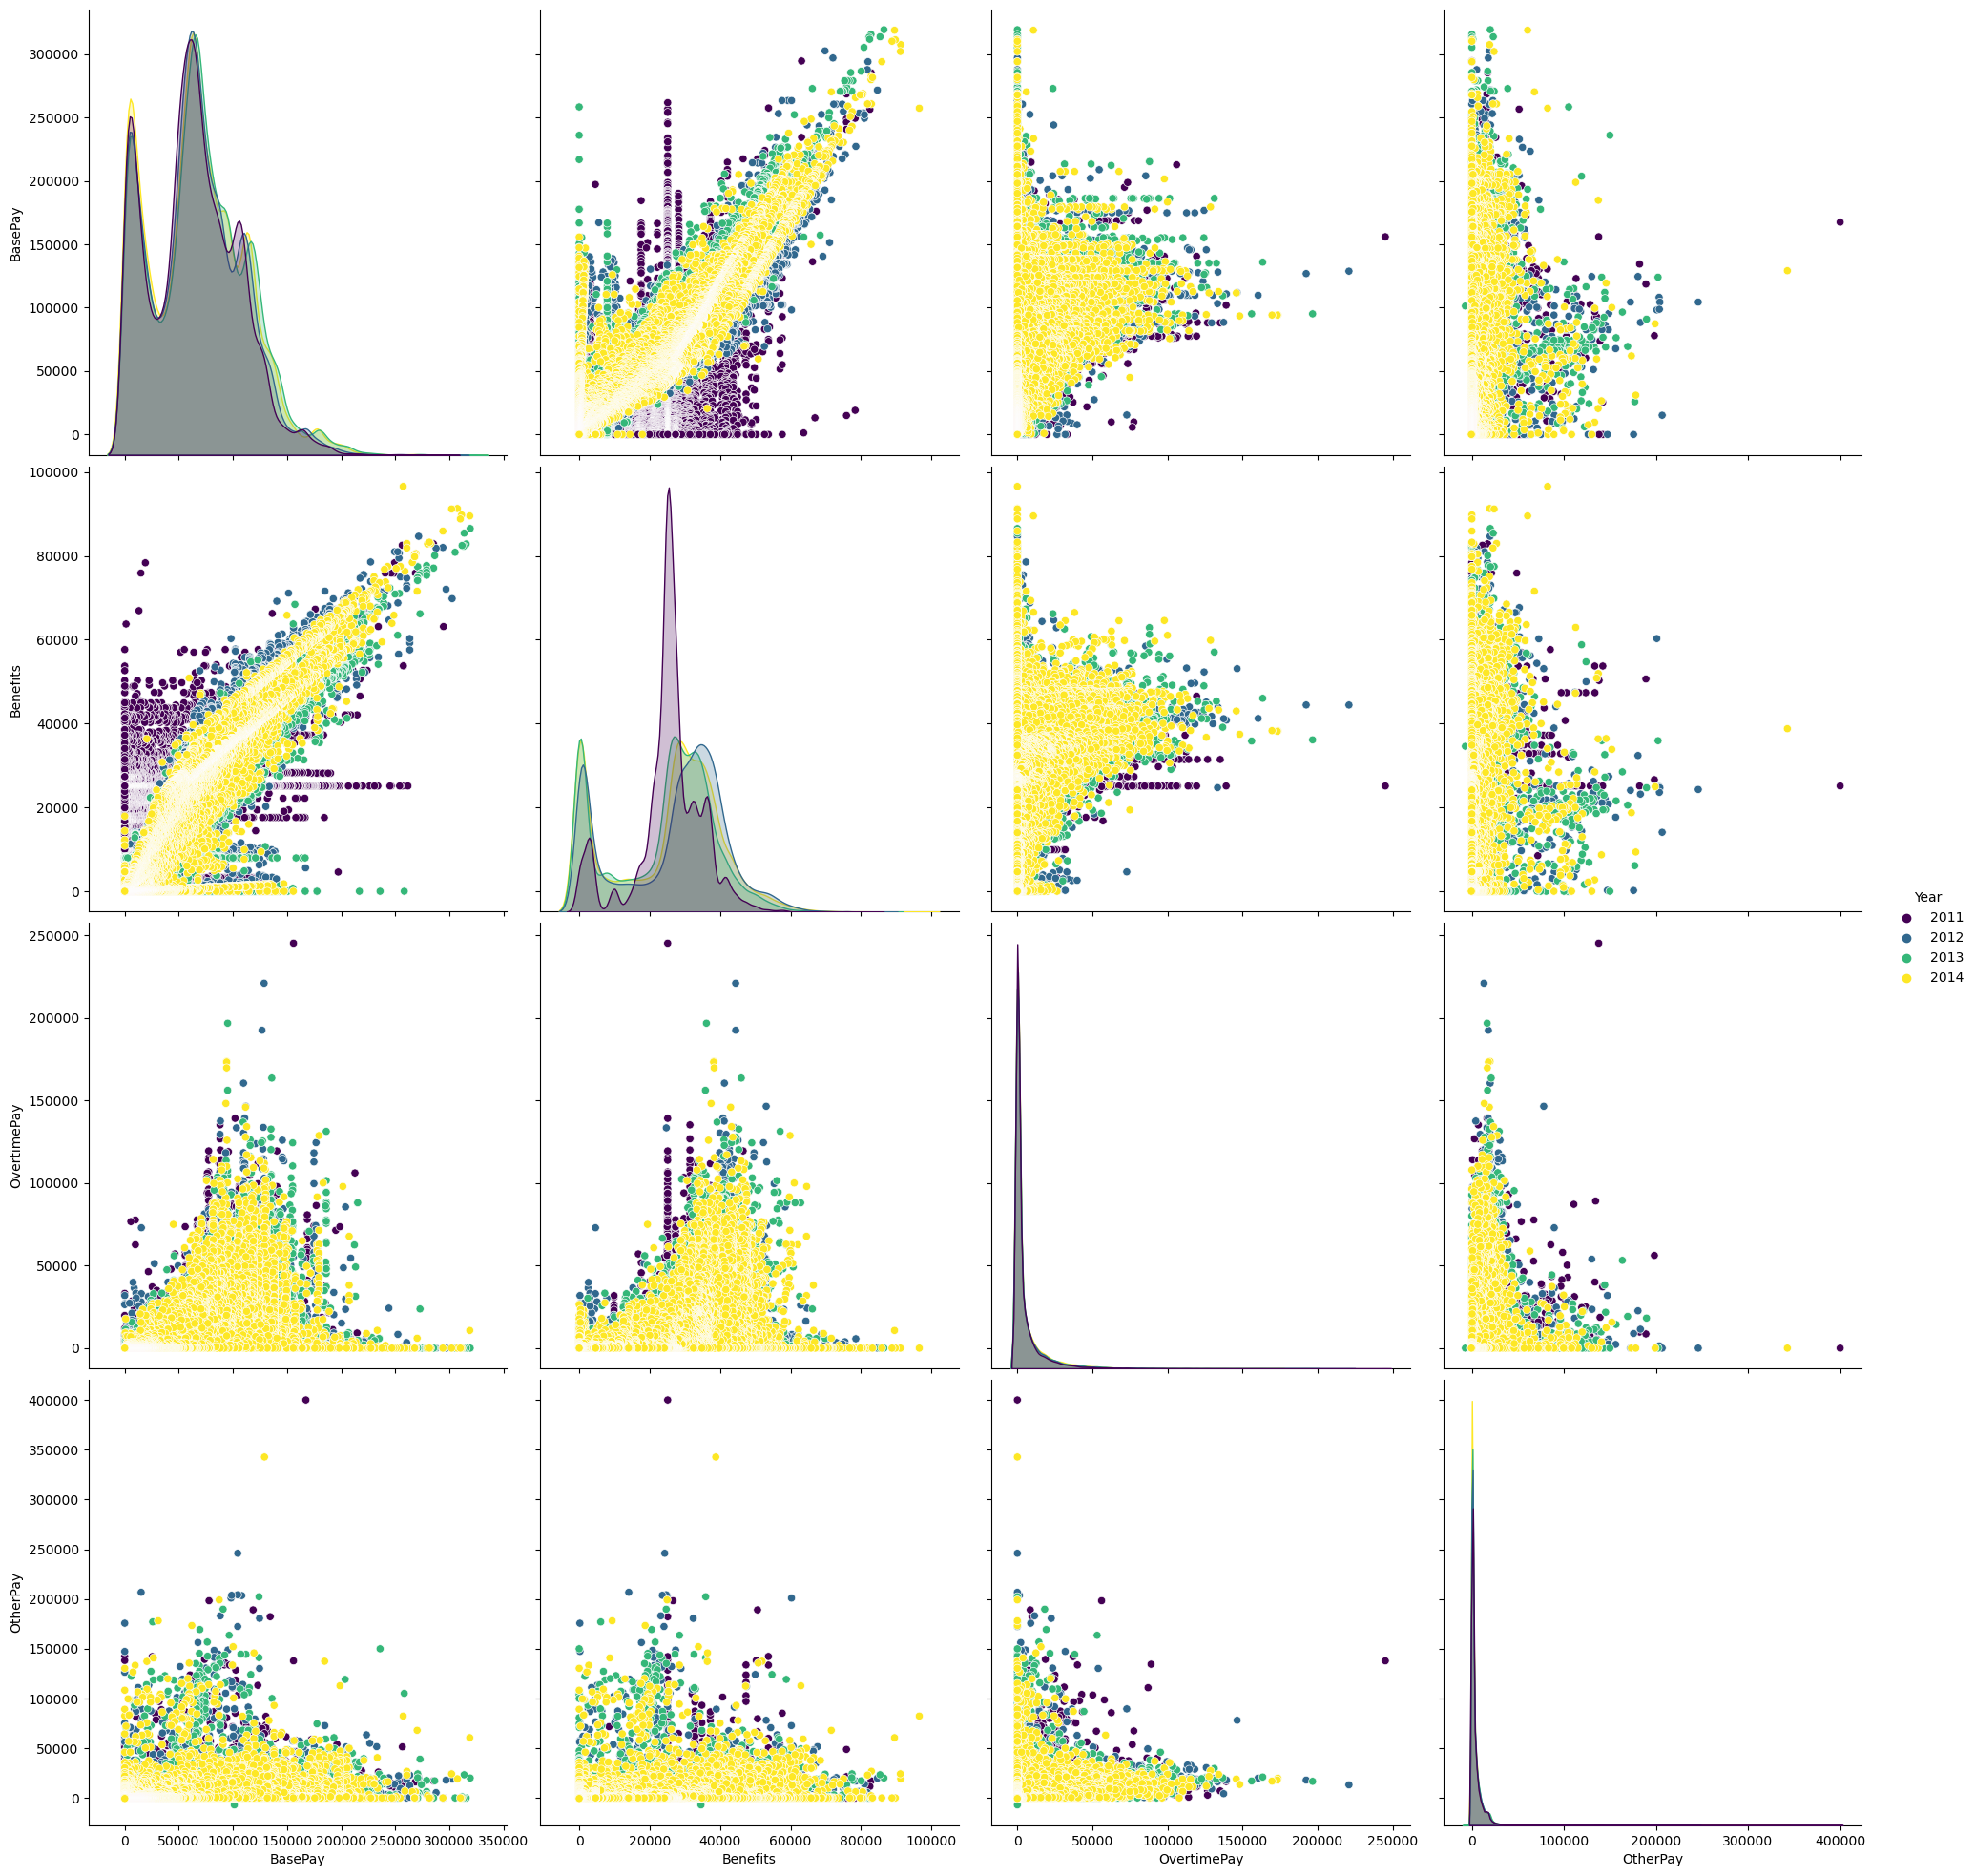

In [192]:
sns.pairplot(df, hue='Year', vars=['BasePay', 'Benefits', 'OvertimePay', 'OtherPay'], height=5,palette='viridis')
plt.show()

With the exception of 2014 having the biggest count of distribution compared to the other years, it is rather similar to earlier Pairplots.

##Visualizing how the BasePay,OvertimePay,OtherPay,Benefits are distributed over the Status 

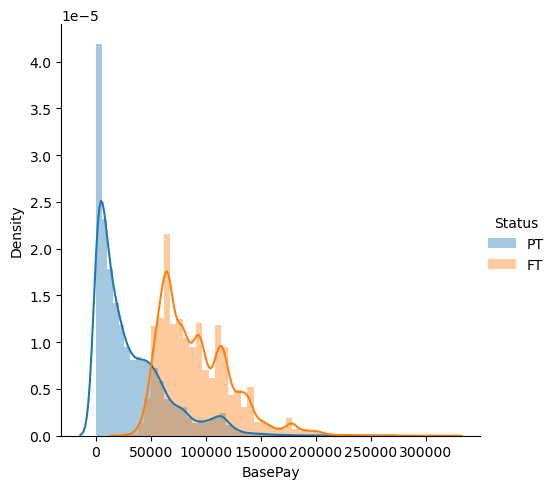

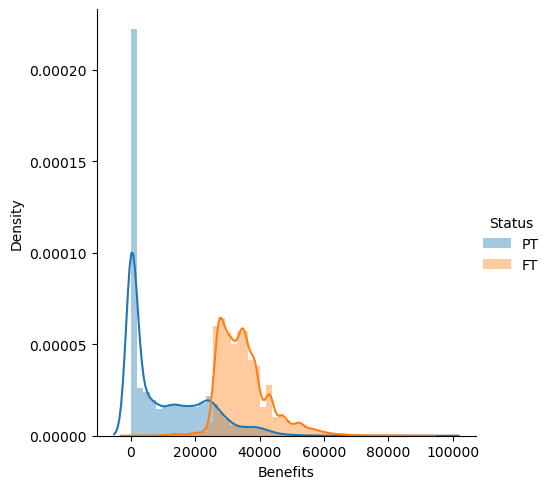

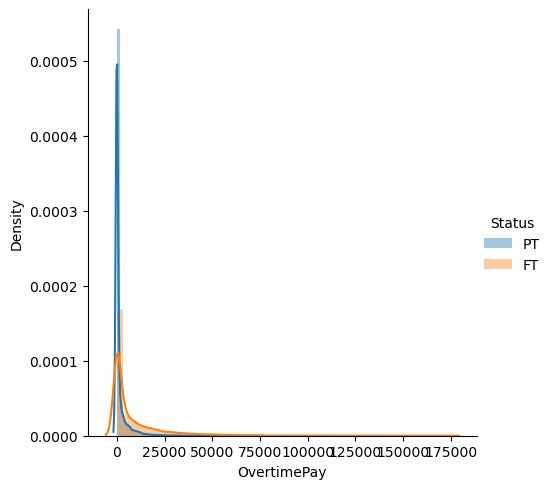

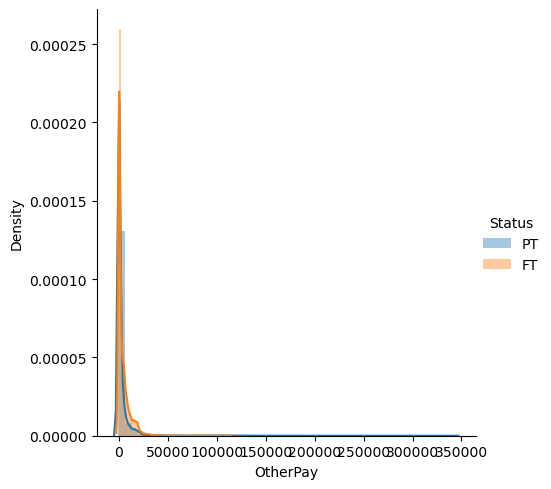

In [100]:
# Plot 1
g = sns.FacetGrid(df, hue='Status', height=5)
g.map(sns.distplot, 'BasePay').add_legend()
plt.show()

# Plot 2
g = sns.FacetGrid(df, hue='Status', height=5)
g.map(sns.distplot, 'Benefits').add_legend()
plt.show()

# Plot 3
g = sns.FacetGrid(df, hue='Status', height=5)
g.map(sns.distplot, 'OvertimePay').add_legend()
plt.show()

# Plot 4
g = sns.FacetGrid(df, hue='Status', height=5)
g.map(sns.distplot, 'OtherPay').add_legend()
plt.show()




Distribution of a 'BasePay', 'Benefits' and 'TotalPay', JobTitle by year using violin-plot



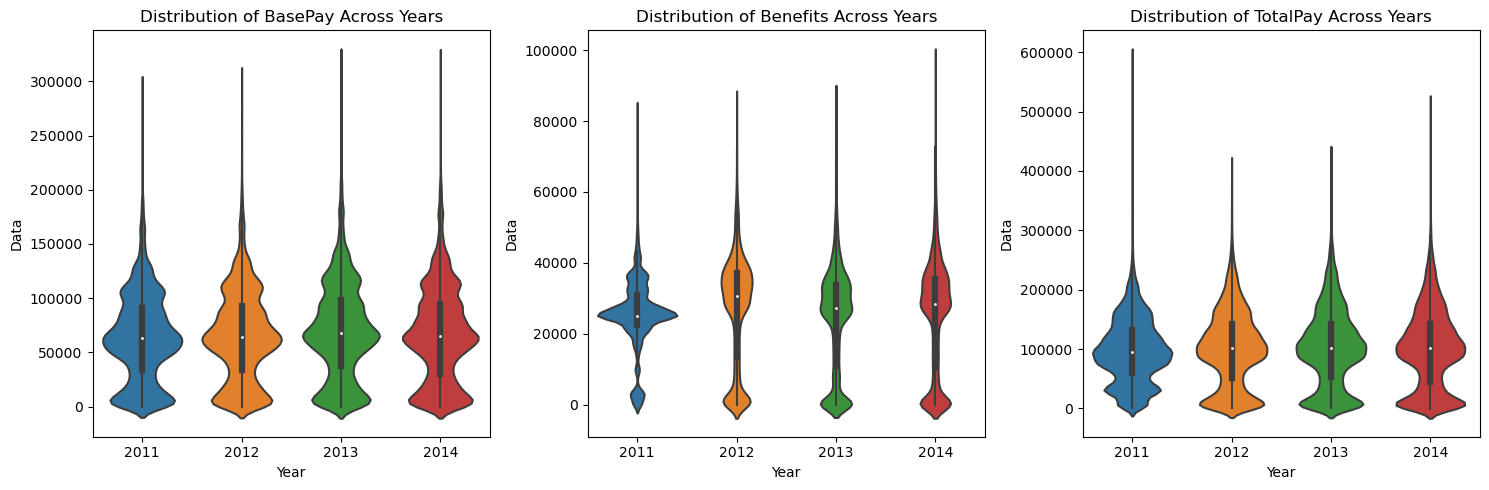

In [63]:
params = ['BasePay', 'Benefits', 'TotalPay']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, param in enumerate(params):
    sns.violinplot(data=df, x='Year', y=param, ax=axs[i])
    axs[i].set_title(f"Distribution of {param} Across Years")
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Data')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='TotalPay', ylabel='Density'>

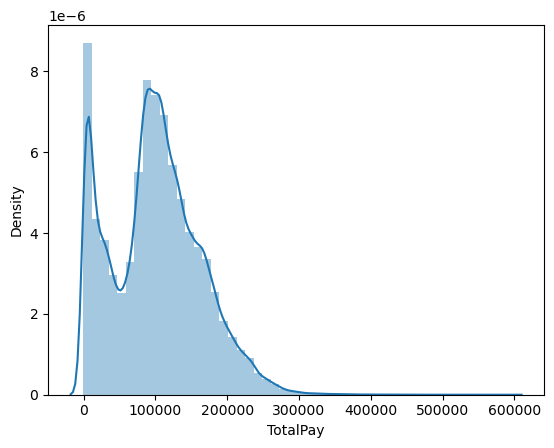

In [65]:
sns.distplot(df['TotalPay'])

Total Pay is distributed from 0 to 300 K. More counts between the range from  100k to 200k

## Analysis


Employees who earn the highest totalPay amount in each year.

In [66]:
df['JobTitle'] = df['JobTitle'].str.lower()
years = df['Year'].unique()
for year in years:
    sorteddata = df[df['Year']==year].sort_values(by='TotalPay',ascending=False)
    employeeName = sorteddata['EmployeeName'].iloc[0]
    job=sorteddata['JobTitle'].iloc[0]
    Pay = sorteddata['TotalPay'].iloc[0]
    print("In the year %d %s (%s) earned the highest salary which is %8.1f"%(year,employeeName,job,Pay))

In the year 2011 NATHANIEL FORD (general manager-metropolitan transit authority) earned the highest salary which is 592717.0
In the year 2012 Gary Altenberg (lieutenant, fire suppression) earned the highest salary which is 407274.8
In the year 2013 Gregory P Suhr (chief of police) earned the highest salary which is 425815.3
In the year 2014 David Shinn (deputy chief 3) earned the highest salary which is 510732.7


Highest Paid EmployeeName

In [67]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

EmployeeName                                        JobTitle    BasePay  \
0  NATHANIEL FORD  general manager-metropolitan transit authority  167411.18   

   OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  Year Status  
0          0.0  400184.25  25121.59  592717.02         592717.02  2011    NaN

Lowest Paid Employee

In [68]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

EmployeeName                    JobTitle  BasePay  OvertimePay  \
148653    Joe Lopez  counselor, log cabin ranch      0.0          0.0   

        OtherPay  Benefits  TotalPay  TotalPayBenefits  Year Status  
148653   -618.13       0.0   -618.13           -618.13  2014     PT

#Highest BasePay

In [69]:
df[df['BasePay'] == df['BasePay'].max()]

EmployeeName         JobTitle    BasePay  OvertimePay  OtherPay  \
72925  Gregory P Suhr  chief of police  319275.01          0.0  20007.06   

       Benefits   TotalPay  TotalPayBenefits  Year Status  
72925  86533.21  425815.28         425815.28  2013    NaN

What was the average BasePay of all employees per year (2011-2014) ?

In [70]:
df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69467.422265
2014    66564.421924
Name: BasePay, dtype: float64

How Many Unique Job Titles?

In [71]:
df['JobTitle'].nunique()


1391

How many Job Titles were represented by only one person in 2013? 

In [72]:
(df[df['Year']==2013]['JobTitle'].value_counts()==1).sum()

201

How many people have the word Chief in their job title? 

In [73]:
df['JobTitle'].apply(lambda str:('chief' in str.lower())).sum()

664

In [74]:
df.describe(include=['O'])

EmployeeName          JobTitle Status
count        148650            148650  38119
unique       110810              1391      2
top       Kevin Lee  transit operator     FT
freq             13              9424  22334

Is it a correlation between length of job title and salaries?


In [75]:
df['Title_len'] = df['JobTitle'].apply(len)
df[['JobTitle', 'Title_len']]

JobTitle  Title_len
0       general manager-metropolitan transit authority         46
1                      captain iii (police department)         31
2                      captain iii (police department)         31
3                       wire rope cable maint mechanic         30
4         deputy chief of department,(fire department)         44
...                                                ...        ...
148645                       human services technician         25
148647                     communications dispatcher 2         27
148648                                       custodian          9
148649                                       custodian          9
148653                      counselor, log cabin ranch         26

[148650 rows x 2 columns]

In [76]:
df[['TotalPayBenefits' , 'Title_len']].corr()

TotalPayBenefits  Title_len
TotalPayBenefits          1.000000   0.005774
Title_len                 0.005774   1.000000

<AxesSubplot:>

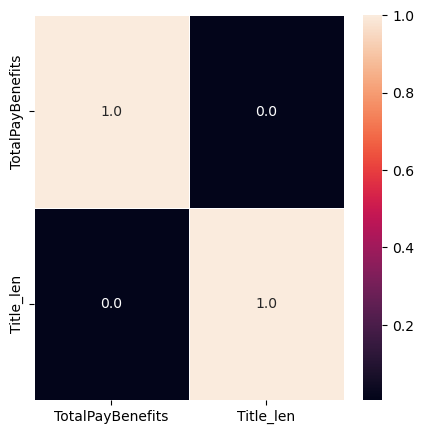

In [77]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df[['TotalPayBenefits' , 'Title_len']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

 In this case, the correlation coefficient (-0.016553) indicates a very minimal, almost negligible, negative linear relationship between 'TotalPayBenefits' and 'Title_len'.

** What is the job title of JOSEPH DRISCOLL

In [78]:
df[df['EmployeeName']=='JOSEPH DRISCOLL'][['JobTitle','TotalPay']]

JobTitle  TotalPay
24  captain, fire suppression  317694.9

Text(0.5, 1.0, 'Correlation between pays')

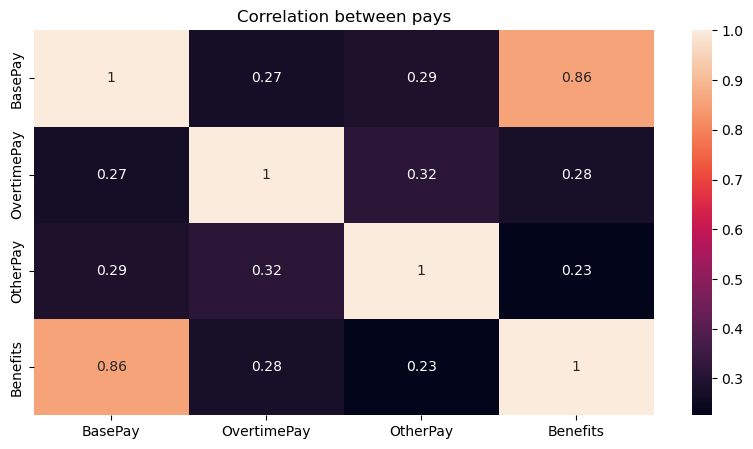

In [80]:
plt.subplots(figsize=(10,5))
sns.heatmap(df[['BasePay','OvertimePay','OtherPay','Benefits']].corr(),annot=True)
plt.title('Correlation between pays')

BasePay and Benefits are highly corelated, meaning Benefits increases when basepay is increased. And Overtimepay ,otherpay have the coefficients very low.

##Identifying jobs which has better pay structure

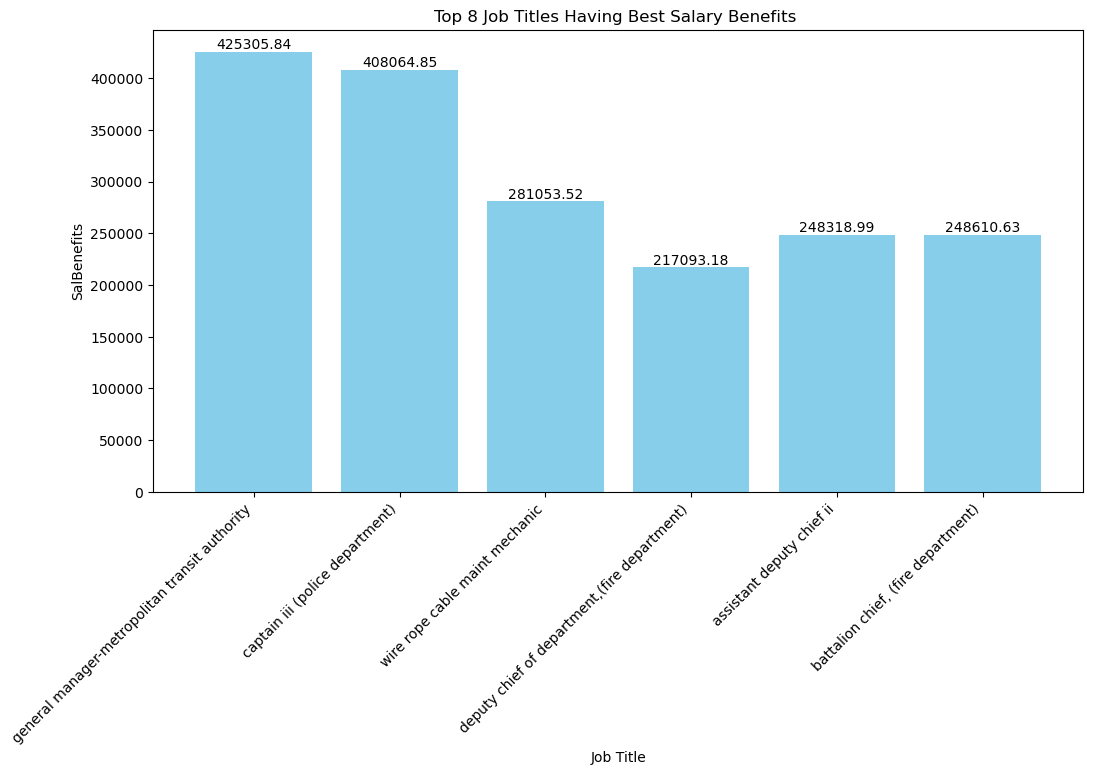

In [195]:
df['SalBenefits'] = df['OvertimePay'] + df['OtherPay'] + df['Benefits']

# Filter rows where 'SalBenefits' > 'BasePay'
top10_df = df[df['SalBenefits'] > df['BasePay']][0:6]

# Plot the top 8 job titles
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_df['JobTitle'], top10_df['SalBenefits'], color='skyblue')
plt.title('Top 8 Job Titles Having Best Salary Benefits ')
plt.xlabel('Job Title')
plt.ylabel('SalBenefits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add total amount above each bar
for bar, total_amount in zip(bars, top10_df['SalBenefits']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{total_amount:.2f}', ha='center', va='bottom', color='black')

plt.show()

These positions are highly compensated. It could be because of their tight ties to emergency services, among other factors.

## Relation between Years and jobs

Text(0, 0.5, 'Number of jobs')

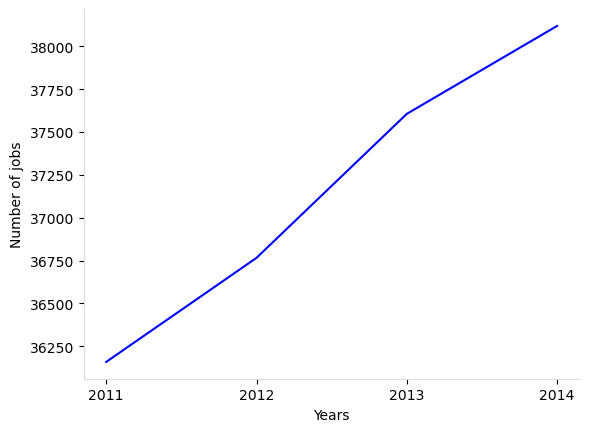

In [83]:

lis = df.groupby('Year')['JobTitle'].count()

num_jobs = []
for year, count in lis.items():
    temp = df[df['Year'] == year]['JobTitle'].count()
    num_jobs.append(temp)

ax = plt.subplot()
ax.plot(lis.index, num_jobs, color='blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

ax.set_xticks(lis.index)
ax.set_xlabel('Years')
ax.set_ylabel('Number of jobs')

Total Job counts are increasing as the year increases.

2012 = 1.3% 
2013 = 3.4% 
2014 = 0.7%

Despite 2014's decline from 2013, the straight curve is still visible.


##Job Titles Group by Every Year

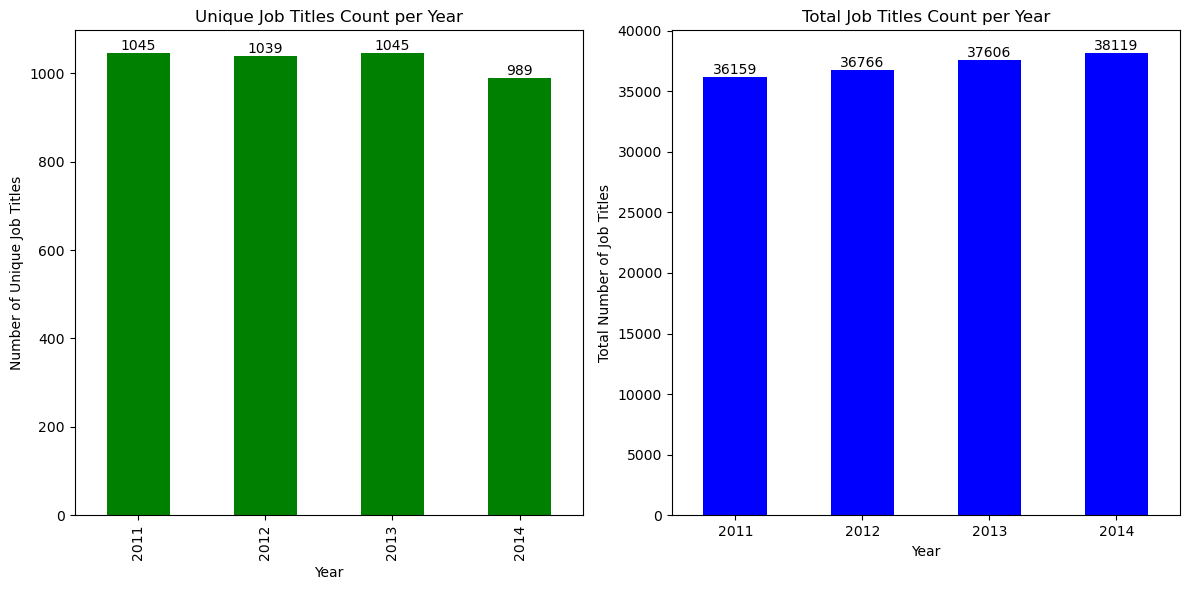

In [148]:
unique_jobtitles_count_per_year = df.groupby('Year')['JobTitle'].nunique()

# Group by 'Year' and get the count of all job titles for each year
total_jobtitles_count_per_year = df.groupby('Year')['JobTitle'].count()

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Unique Job Titles Count per Year
ax1 = axes[0]
unique_jobtitles_count_per_year.plot(kind='bar', color='green', ax=ax1)
ax1.set_title('Unique Job Titles Count per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Unique Job Titles')

# Add count values on top of each bar for the first subplot
for i, v in enumerate(unique_jobtitles_count_per_year):
    ax1.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

# Plot 2: Total Job Titles Count per Year
ax2 = axes[1]
total_jobtitles_count_per_year.plot(kind='bar', color='blue', ax=ax2)
ax2.set_title('Total Job Titles Count per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Number of Job Titles')

# Add count values on top of each bar for the second subplot
for i, v in enumerate(total_jobtitles_count_per_year):
    ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', color='black')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Salary Budget Planning for the City Workers

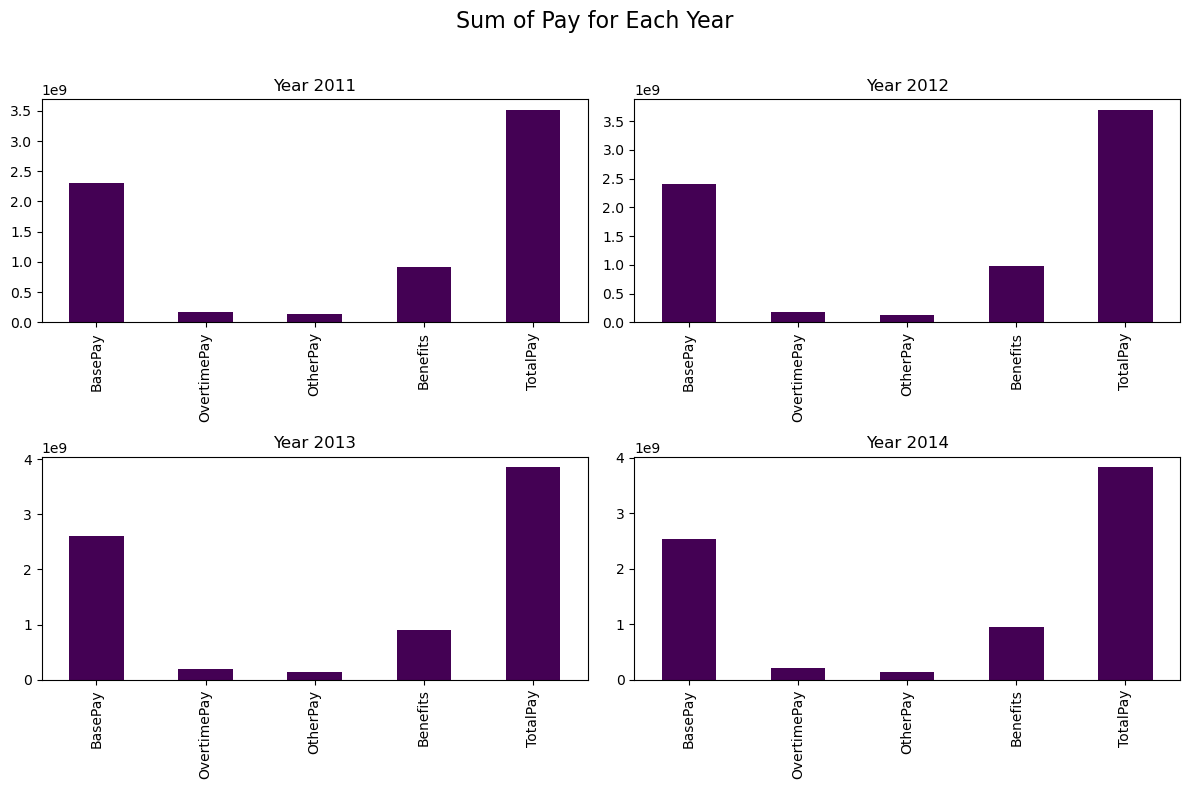

In [128]:
selected_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']

# Group by 'Year' and calculate the sum for all numeric columns
grouped_df = df.groupby('Year').sum()

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sum of Pay for Each Year', fontsize=16)

# Plot for Year 2011
grouped_df[selected_columns[:-2]].loc[2011].plot(kind='bar', ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('Year 2011')

# Plot for Year 2012
grouped_df[selected_columns[:-2]].loc[2012].plot(kind='bar', ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title('Year 2012')

# Plot for Year 2013
grouped_df[selected_columns[:-2]].loc[2013].plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Year 2013')

# Plot for Year 2014
grouped_df[selected_columns[:-2]].loc[2014].plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Year 2014')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlapping titles
plt.show()

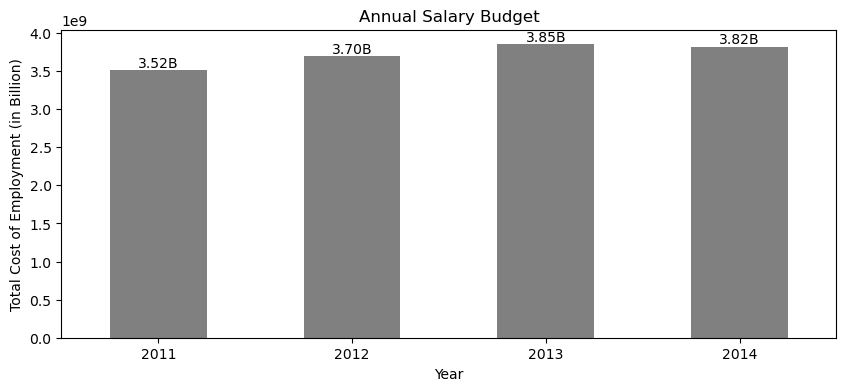

In [201]:
totalpay_sum = df.groupby('Year')['TotalPay'].sum()

# Create a bar plot
plt.figure(figsize=(10, 4))
ax = totalpay_sum.plot(kind='bar', color='gray')
plt.title('Annual Salary Budget')
plt.xlabel('Year')
plt.ylabel('Total Cost of Employment (in Billion)')
plt.xticks(rotation=0)

# Add total value above each bar
for bar, total_value in zip(ax.patches, totalpay_sum):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{total_value / 1e9:.2f}B', ha='center', va='bottom', color='black')

plt.show()

It shows that Yearly 3.5-4.0 Billions to be allocated for Salary Budget